Data Cleaning and Preprocessing

In [45]:
import pandas as pd



# Load the dataset

df = pd.read_csv('/kaggle/input/combined/combined_report_data.csv')



# Set display options to show all columns

pd.set_option('display.max_columns', None)  # None means no limit on columns

pd.set_option('display.max_rows', None)     # Optional: To see all rows if needed



# Print all column names and their data types

print("Column Names and Data Types:")

print(df.dtypes)



# Drop specified columns

columns_to_drop = [

    'email', 'phone', 'startDate', 'dateOfBirth', 'gender', 

    'address', 'verify', 'additionalAchievements', 'dateAchieved', 

    'organization', 'achievementTitle', 'description', 

    'additionalCertifications', 'dateObtained', 'additionalCourses','category','courseDuration', 'duration'

]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # errors='ignore' avoids errors if columns don't exist



# Fill missing values for categorical columns with mode or 'None'

categorical_columns = [

    'programmingLanguages', 'courseName', 'platform_x', 'specialization_x',

    'courseType', 'completionStatus', 'certificationTitle', 'platform_y',

    'specialization_y',  'favoriteProject',

    'position', 'employmentStatus', 'projectType'

]



for column in categorical_columns:

    # Fill with mode or 'None'

    mode_value = df[column].mode()[0] if not df[column].mode().empty else 'None'

    df[column] = df[column].fillna(mode_value)



# Fill missing values for numerical columns with mean

numerical_columns = [

    'communication', 'problemSolving', 'timeManagement', 

    'softwareEngineerProjects', 'consultantProjects', 'fullStackProjects', 

    'dataAnalystProjects', 'dataEngineerProjects', 'dataScienceProjects', 

    'otherProjects', 'teamwork', 'adaptability', 'criticalThinking', 

    'creativity', 'leadership', 'interpersonalSkills', 'emotionalIntelligence', 

    'programmingLanguages', 'webDevelopment', 'databaseManagement', 

    'cloudComputing', 'versionControl', 'machineLearning', 

    'dataAnalysis', 'cybersecurity', 'totalCoursesCompleted'

    

]



for column in numerical_columns:

    # Fill with mean or median

    mean_value = df[column].mode() if df[column].notnull().any() else 0

    df[column] = df[column].fillna(mean_value)







# Reset index (optional)

df.reset_index(drop=True, inplace=True)



# Display the first few rows to confirm changes

df.head()


Column Names and Data Types:
firstName                    object
lastName                     object
email                        object
phone                       float64
position                     object
employeeid                   object
startDate                    object
dateOfBirth                  object
gender                       object
address                      object
employmentStatus             object
userId                       object
softwareEngineerProjects      int64
consultantProjects            int64
fullStackProjects             int64
dataAnalystProjects           int64
dataEngineerProjects          int64
dataScienceProjects           int64
otherProjects                 int64
projectType                  object
toolsUsed                    object
favoriteProject              object
communication                 int64
teamwork                     object
problemSolving                int64
adaptability                 object
timeManagement                int64

,firstName,lastName,position,employeeid,employmentStatus,userId,softwareEngineerProjects,consultantProjects,fullStackProjects,dataAnalystProjects,dataEngineerProjects,dataScienceProjects,otherProjects,projectType,toolsUsed,favoriteProject,communication,teamwork,problemSolving,adaptability,timeManagement,criticalThinking,creativity,leadership,interpersonalSkills,emotionalIntelligence,programmingLanguages,webDevelopment,databaseManagement,cloudComputing,versionControl,machineLearning,dataAnalysis,cybersecurity,courseName,platform_x,specialization_x,totalCoursesCompleted,courseType,completionStatus,certificationTitle,platform_y,specialization_y,competencyLevel
0,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
1,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
2,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
3,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
4,Kyle Willis,Johnson,Data Engineer,JMD2098,contract,439be286-a73e-4792-bc0e-28305dd5f9b2,10,1,0,1,8,3,0,Full Stack,R,Offer.,8,Leader,7,Flexible,1,Strategist,Visionary,Innovator,Visionary,Leader,3,6,6,Very proficient,Very proficient,Beginner,Intermediate,Master,Machine Learning,LinkedIn Learning,Machine Learning,22.0,Online Course,Completed,Python,Coursera,Web Development,Advanced


In [46]:
# Check for null values in each column

null_counts = df.isnull().sum()

print("\nNull Values Count in Each Column:")

print(null_counts[null_counts > 0])



# Fill missing values for 'competencyLevel' with mode

competency_mode = df['competencyLevel'].mode()[0]

df['competencyLevel'].fillna(competency_mode, inplace=True)



# Fill missing values for 'totalCoursesCompleted' with mean

total_courses_mean = df['totalCoursesCompleted'].mean()

df['totalCoursesCompleted'].fillna(total_courses_mean, inplace=True)



# Check again for null values after filling

print("\nNull Values Count in Each Column After Filling:")

print(df.isnull().sum())



# Display the first few rows to confirm changes

print("\nFirst Few Rows of the Dataset After Filling Missing Values:")

df.head()


Null Values Count in Each Column:
totalCoursesCompleted    30955
competencyLevel          31107
dtype: int64

Null Values Count in Each Column After Filling:


/tmp/ipykernel_131/2052048510.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['competencyLevel'].fillna(competency_mode, inplace=True)
/tmp/ipykernel_131/2052048510.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

firstName                   0
lastName                    0
position                    0
employeeid                  0
employmentStatus            0
userId                      0
softwareEngineerProjects    0
consultantProjects          0
fullStackProjects           0
dataAnalystProjects         0
dataEngineerProjects        0
dataScienceProjects         0
otherProjects               0
projectType                 0
toolsUsed                   0
favoriteProject             0
communication               0
teamwork                    0
problemSolving              0
adaptability                0
timeManagement              0
criticalThinking            0
creativity                  0
leadership                  0
interpersonalSkills         0
emotionalIntelligence       0
programmingLanguages        0
webDevelopment              0
databaseManagement          0
cloudComputing              0
versionControl              0
machineLearning             0
dataAnalysis                0
cybersecur

,firstName,lastName,position,employeeid,employmentStatus,userId,softwareEngineerProjects,consultantProjects,fullStackProjects,dataAnalystProjects,dataEngineerProjects,dataScienceProjects,otherProjects,projectType,toolsUsed,favoriteProject,communication,teamwork,problemSolving,adaptability,timeManagement,criticalThinking,creativity,leadership,interpersonalSkills,emotionalIntelligence,programmingLanguages,webDevelopment,databaseManagement,cloudComputing,versionControl,machineLearning,dataAnalysis,cybersecurity,courseName,platform_x,specialization_x,totalCoursesCompleted,courseType,completionStatus,certificationTitle,platform_y,specialization_y,competencyLevel
0,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
1,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
2,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
3,Laura Simmons,Wright,Data Engineer,JMD8117,full_time,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,8,1,2,5,2,0,1,Consulting,Python,Cultural subject.,7,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner
4,Kyle Willis,Johnson,Data Engineer,JMD2098,contract,439be286-a73e-4792-bc0e-28305dd5f9b2,10,1,0,1,8,3,0,Full Stack,R,Offer.,8,Leader,7,Flexible,1,Strategist,Visionary,Innovator,Visionary,Leader,3,6,6,Very proficient,Very proficient,Beginner,Intermediate,Master,Machine Learning,LinkedIn Learning,Machine Learning,22.0,Online Course,Completed,Python,Coursera,Web Development,Advanced


Exploratory Data Analysis

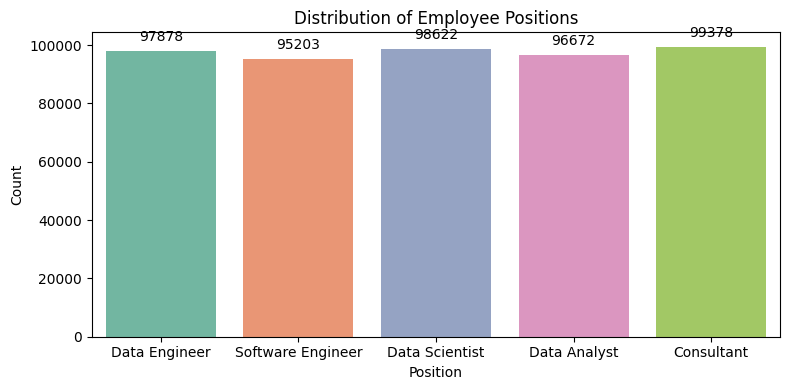

In [47]:
import seaborn as sns

import matplotlib.pyplot as plt



# Set the figure size

plt.figure(figsize=(8, 4))



# Create the count plot

bar_plot = sns.countplot(data=df, x='position', palette='Set2')



# Set the title and labels

plt.title('Distribution of Employee Positions')

plt.xlabel('Position')

plt.ylabel('Count')







# Add count on top of each bar, horizontally

for p in bar_plot.patches:

    bar_plot.annotate(f'{int(p.get_height())}', 

                      (p.get_x() + p.get_width() / 2., p.get_height()), 

                      ha='center', va='bottom', 

                      fontsize=10, color='black', 

                      rotation=0,  # Set rotation to 0 for horizontal text

                      xytext=(0, 5),  # Offset the text a bit above the bar

                      textcoords='offset points')



# Show the plot

plt.tight_layout()

plt.show()


In [48]:
descriptive_stats = df.describe()

descriptive_stats


,softwareEngineerProjects,consultantProjects,fullStackProjects,dataAnalystProjects,dataEngineerProjects,dataScienceProjects,otherProjects,communication,problemSolving,timeManagement,programmingLanguages,webDevelopment,databaseManagement,totalCoursesCompleted
count,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000,487753.000000
mean,4.993905,2.501928,2.494289,2.513666,5.026987,5.013431,1.494111,5.526516,5.483261,5.454898,3.022351,5.499829,5.517573,55.132579
std,3.191173,1.717925,1.710038,1.695109,3.148065,3.174965,1.119736,2.862661,2.890752,2.867652,1.414527,2.873213,2.857377,25.389927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,34.000000
50%,5.000000,3.000000,2.000000,3.000000,5.000000,5.000000,1.000000,6.000000,5.000000,5.000000,3.000000,5.000000,6.000000,55.132579
75%,8.000000,4.000000,4.000000,4.000000,8.000000,8.000000,2.000000,8.000000,8.000000,8.000000,4.000000,8.000000,8.000000,76.000000
max,10.000000,5.000000,5.000000,5.000000,10.000000,10.000000,3.000000,10.000000,10.000000,10.000000,5.000000,10.000000,10.000000,100.000000


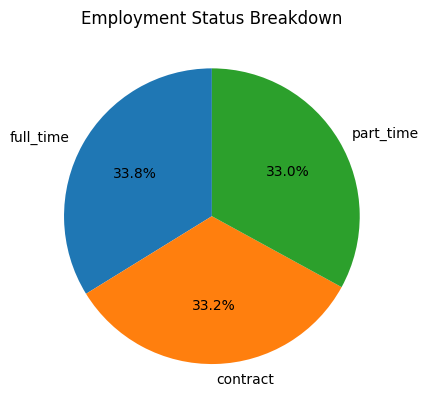

In [49]:
df['employmentStatus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Employment Status Breakdown')

plt.ylabel('')

plt.show()


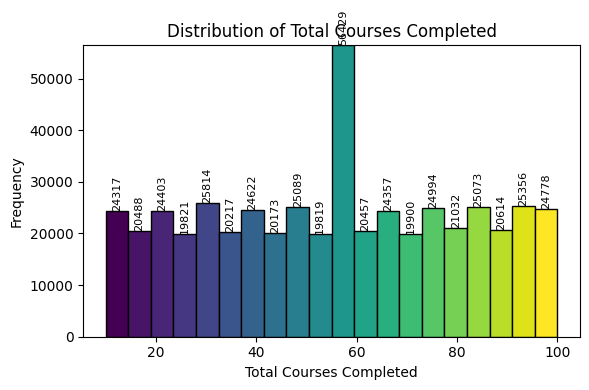

In [50]:
import numpy as np

import matplotlib.pyplot as plt



# Define the number of bins

bins = 20



# Create the figure with increased height

plt.figure(figsize=(6, 4))  # Increase the height by changing the second value



# Create the histogram and get the patches (bars)

counts, bin_edges, patches = plt.hist(df['totalCoursesCompleted'], bins=bins, edgecolor='black')



# Set the title and labels

plt.title('Distribution of Total Courses Completed')

plt.xlabel('Total Courses Completed')

plt.ylabel('Frequency')



# Create a color palette

colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))



# Assign colors to each patch (bar)

for count, edge, patch in zip(counts, bin_edges, patches):

    patch.set_facecolor(colors[patches.index(patch)])  # Set the color for each bin

    # Annotate the count above each bar, adjust positions

    if count > 0:  # Only annotate if there is a count

        plt.text(edge + (bin_edges[1] - bin_edges[0]) / 2, count + 1, int(count), 

                 ha='center', va='bottom', fontsize=8, rotation=90)



# Adjust y-axis limits for better visibility

plt.ylim(0, max(counts) + 10)  # Increase space above the bars



# Show the plot

plt.tight_layout()

plt.show()


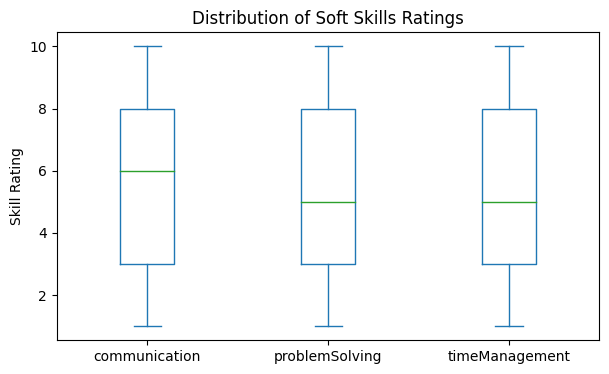

In [51]:
soft_skills = ['communication', 'teamwork', 'problemSolving', 'adaptability', 'timeManagement']

df[soft_skills].plot.box(figsize=(7, 4))

plt.title('Distribution of Soft Skills Ratings')

plt.ylabel('Skill Rating')



plt.show()


In [52]:
position_distribution = df['position'].value_counts()

print(position_distribution)


position
Consultant           99378
Data Scientist       98622
Data Engineer        97878
Data Analyst         96672
Software Engineer    95203
Name: count, dtype: int64


In [53]:
mean_communication = df['communication'].mean()

median_communication = df['communication'].median()

print(f"Mean Communication: {mean_communication}, Median Communication: {median_communication}")


Mean Communication: 5.526516495029246, Median Communication: 6.0


In [54]:
project_type_counts = df.groupby('projectType').size()

print(project_type_counts)


projectType
Consulting              121771
Data Science            121360
Full Stack              124312
Software Engineering    120310
dtype: int64


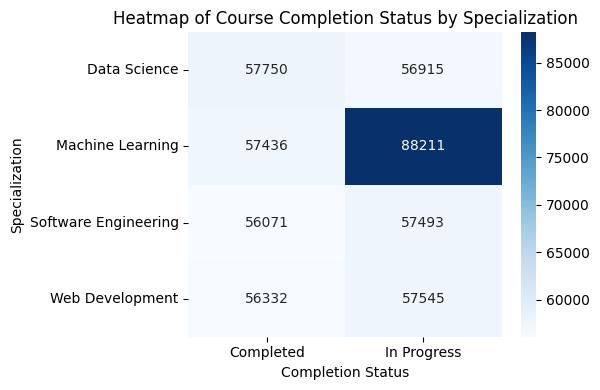

In [55]:
# Set the figure size

plt.figure(figsize=(6, 4))



# Create a pivot table for completion status by specialization

completion_heatmap_data = df.pivot_table(index='specialization_x', columns='completionStatus', aggfunc='size', fill_value=0)



# Create a heatmap

sns.heatmap(completion_heatmap_data, annot=True, fmt='d', cmap='Blues')



# Set the title and labels

plt.title('Heatmap of Course Completion Status by Specialization')

plt.xlabel('Completion Status')

plt.ylabel('Specialization')



# Show the plot

plt.tight_layout()

plt.show()


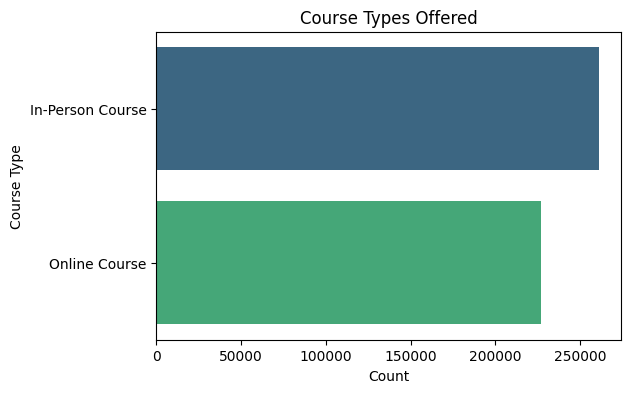

In [56]:
# Calculate course type counts

course_type_counts = df['courseType'].value_counts()



# Create a horizontal bar chart

plt.figure(figsize=(6, 4))

sns.barplot(y=course_type_counts.index, x=course_type_counts.values, palette='viridis')

plt.title('Course Types Offered')

plt.xlabel('Count')

plt.ylabel('Course Type')

plt.show()


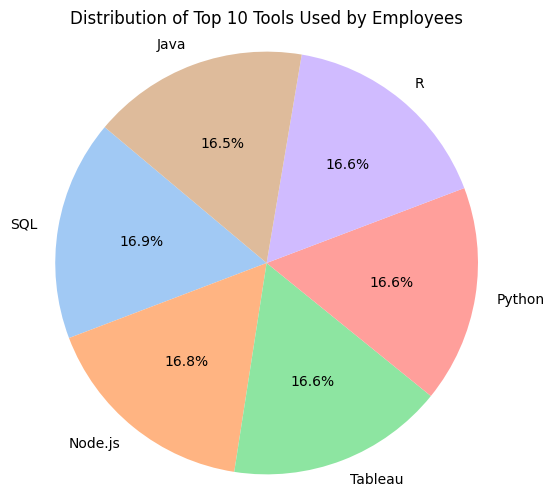

In [57]:
# Get the top 10 tools used by employees

tool_counts = df['toolsUsed'].value_counts().head(10)



# Set the figure size

plt.figure(figsize=(6, 6))



# Create a pie chart

plt.pie(tool_counts, labels=tool_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))



# Set the title

plt.title('Distribution of Top 10 Tools Used by Employees')



# Equal aspect ratio ensures that pie chart is a circle

plt.axis('equal')  



# Show the plot

plt.show()


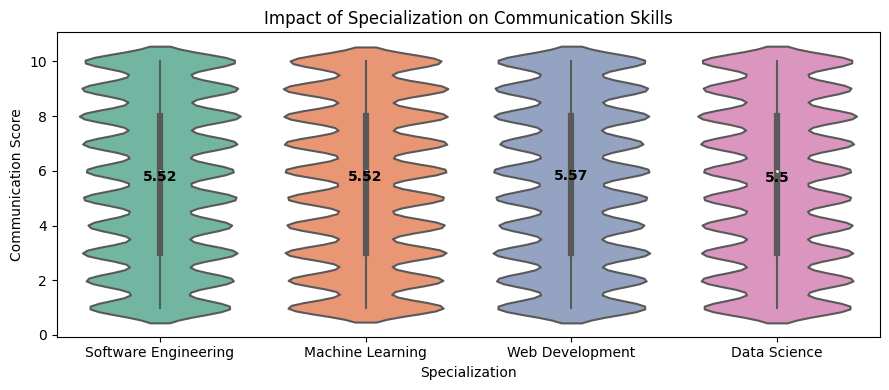

In [58]:
# Set the figure size

plt.figure(figsize=(9, 4))



# Create a violin plot for communication scores by specialization

palette = sns.color_palette("Set2")  # Custom color palette



# Create the violin plot

violin_plot = sns.violinplot(data=df, x='specialization_x', y='communication', palette=palette)



# Set the title and labels

plt.title('Impact of Specialization on Communication Skills')

plt.ylabel('Communication Score')

plt.xlabel('Specialization')



# Rotate x-ticks for better readability





# Optionally, you can add the mean point for better understanding

mean_values = df.groupby('specialization_x')['communication'].mean()

for i, specialization in enumerate(mean_values.index):

    plt.text(i, mean_values[specialization] + 0.1, round(mean_values[specialization], 2), 

             horizontalalignment='center', size='medium', color='black', weight='semibold')



# Show the plot

plt.tight_layout()

plt.show()


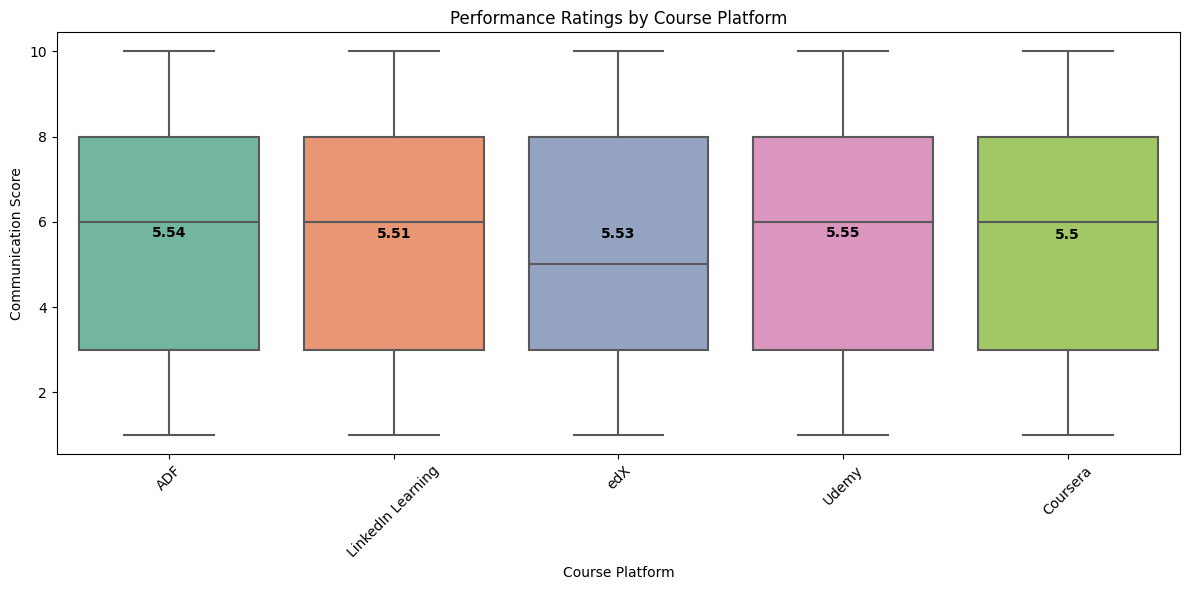

In [59]:




# Set the figure size

plt.figure(figsize=(12, 6))



# Create a boxplot for communication ratings by platform

palette = sns.color_palette("Set2")  # Custom color palette



# Create the boxplot

boxplot = sns.boxplot(data=df, x='platform_x', y='communication', palette=palette)



# Set the title and labels

plt.title('Performance Ratings by Course Platform')

plt.ylabel('Communication Score')

plt.xlabel('Course Platform')



# Rotate x-ticks for better readability

plt.xticks(rotation=45)



# Optionally, you can add the mean point for better understanding

mean_values = df.groupby('platform_x')['communication'].mean()

for i, platform in enumerate(mean_values.index):

    plt.text(i, mean_values[platform] + 0.1, round(mean_values[platform], 2), 

             horizontalalignment='center', size='medium', color='black', weight='semibold')



# Show the plot

plt.tight_layout()

plt.show()


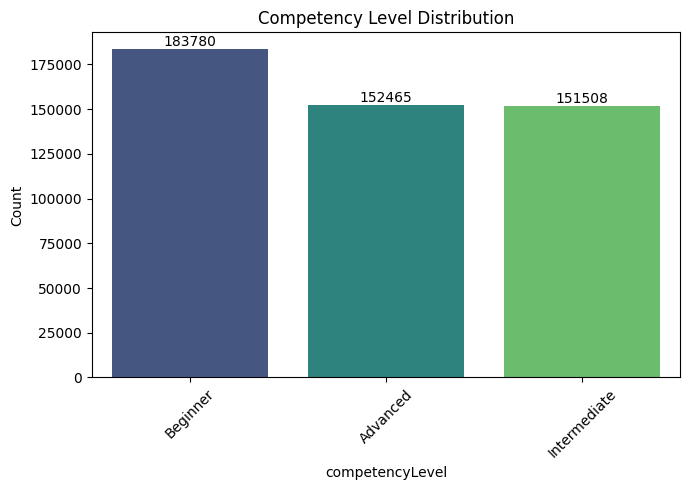

In [60]:




# Set the color palette for the count plot

palette = sns.color_palette("viridis", len(df['competencyLevel'].value_counts()))



# Create a count plot for competency levels

plt.figure(figsize=(7, 5))

count_plot = sns.countplot(data=df, x='competencyLevel', palette=palette)



# Adding count labels on top of each bar

for p in count_plot.patches:

    count_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),

                        ha='center', va='bottom')



# Set titles and labels

plt.title('Competency Level Distribution')

plt.ylabel('Count')

plt.xticks(rotation=45)



# Optionally, set y-axis limit (you can adjust the limit if needed)

# plt.ylim(0, max(df['competencyLevel'].value_counts()) + 10)



# Show the plot

plt.tight_layout()

plt.show()




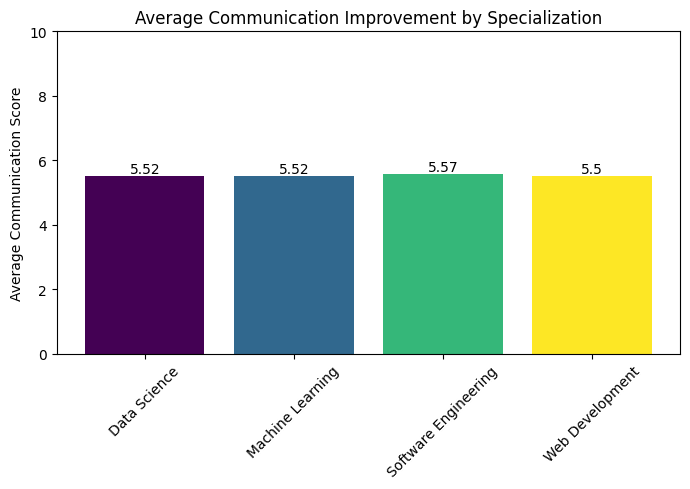

In [61]:


# Calculate the average communication score by specialization

improvement_by_specialization = df.groupby('specialization_x')['communication'].mean()



# Create a bar plot with different colors for each bar

colors = plt.cm.viridis(np.linspace(0, 1, len(improvement_by_specialization)))  # Different color for each bar



# Plotting the bar chart

plt.figure(figsize=(7, 5))

bars = plt.bar(improvement_by_specialization.index, improvement_by_specialization.values, color=colors)



# Adding average score labels on top of each bar

for bar in bars:

    yval = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')



# Set y-axis limit

plt.ylim(0, 10)



# Set titles and labels

plt.title('Average Communication Improvement by Specialization')

plt.ylabel('Average Communication Score')

plt.xticks(rotation=45)



# Show the plot

plt.tight_layout()

plt.show()


Feature Engineering & Feature Selection

In [62]:
#Total Projects:



df['total_projects'] = df[['softwareEngineerProjects', 'consultantProjects', 'fullStackProjects', 

                             'dataAnalystProjects', 'dataEngineerProjects', 'dataScienceProjects', 

                             'otherProjects']].sum(axis=1)

In [63]:
#Communication Score:



df['soft_skills_score'] = df[['communication', 'problemSolving']].mean(axis=1)


In [64]:
#Project Type Count:



df['unique_project_types'] = df['projectType'].apply(lambda x: len(set(x.split(','))) if pd.notnull(x) else 0)


In [65]:
#Education Level:



df['courseType_encoded'] = df['courseType'].map({'Certification': 1, 'Degree': 2, 'Diploma': 3}).fillna(0)


Feature Transformation

In [66]:
#Encoding Categorical Variables:



df = pd.get_dummies(df, columns=['position','employmentStatus'], drop_first=True)


In [67]:
#Scaling Numerical Features:

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

df[['softwareEngineerProjects', 'consultantProjects', 'fullStackProjects', 'dataAnalystProjects', 

    'dataEngineerProjects', 'dataScienceProjects', 'otherProjects', 'communication', 'soft_skills_score']] = scaler.fit_transform(

    df[['softwareEngineerProjects', 'consultantProjects', 'fullStackProjects', 'dataAnalystProjects', 

        'dataEngineerProjects', 'dataScienceProjects', 'otherProjects', 'communication', 'soft_skills_score']])


In [68]:
#Binning Numerical Variables



df['communication_binned'] = pd.cut(df['communication'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])


In [69]:
# Concatenating firstName and lastName to create employeeName

df['employeeName'] = df['firstName'] + ' ' + df['lastName']



# Display the updated DataFrame to verify the new column

print(df[['firstName', 'lastName', 'employeeName']].head())



columns = ['employeeName'] + [col for col in df.columns if col != 'employeeName']

df = df[columns]

       firstName lastName          employeeName
0  Laura Simmons   Wright  Laura Simmons Wright
1  Laura Simmons   Wright  Laura Simmons Wright
2  Laura Simmons   Wright  Laura Simmons Wright
3  Laura Simmons   Wright  Laura Simmons Wright
4    Kyle Willis  Johnson   Kyle Willis Johnson


In [70]:
df.head()

,employeeName,firstName,lastName,employeeid,userId,softwareEngineerProjects,consultantProjects,fullStackProjects,dataAnalystProjects,dataEngineerProjects,dataScienceProjects,otherProjects,projectType,toolsUsed,favoriteProject,communication,teamwork,problemSolving,adaptability,timeManagement,criticalThinking,creativity,leadership,interpersonalSkills,emotionalIntelligence,programmingLanguages,webDevelopment,databaseManagement,cloudComputing,versionControl,machineLearning,dataAnalysis,cybersecurity,courseName,platform_x,specialization_x,totalCoursesCompleted,courseType,completionStatus,certificationTitle,platform_y,specialization_y,competencyLevel,total_projects,soft_skills_score,unique_project_types,courseType_encoded,position_Data Analyst,position_Data Engineer,position_Data Scientist,position_Software Engineer,employmentStatus_full_time,employmentStatus_part_time,communication_binned
0,Laura Simmons Wright,Laura Simmons,Wright,JMD8117,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
1,Laura Simmons Wright,Laura Simmons,Wright,JMD8117,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
2,Laura Simmons Wright,Laura Simmons,Wright,JMD8117,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
3,Laura Simmons Wright,Laura Simmons,Wright,JMD8117,e349f8f1-54fd-41e7-bea6-9cafe3780e4f,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,ADF,Software Engineering,73.0,Online Course,In Progress,AWS,Udemy,Machine Learning,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
4,Kyle Willis Johnson,Kyle Willis,Johnson,JMD2098,439be286-a73e-4792-bc0e-28305dd5f9b2,1.568734,-0.87427,-1.458618,-0.892962,0.944395,-0.634159,-1.334344,Full Stack,R,Offer.,0.864051,Leader,7,Flexible,1,Strategist,Visionary,Innovator,Visionary,Leader,3,6,6,Very proficient,Very proficient,Beginner,Intermediate,Master,Machine Learning,LinkedIn Learning,Machine Learning,22.0,Online Course,Completed,Python,Coursera,Web Development,Advanced,23,0.972332,1,0.0,False,True,False,False,False,False,Low


In [71]:
df.columns

Index(['employeeName', 'firstName', 'lastName', 'employeeid', 'userId',
       'softwareEngineerProjects', 'consultantProjects', 'fullStackProjects',
       'dataAnalystProjects', 'dataEngineerProjects', 'dataScienceProjects',
       'otherProjects', 'projectType', 'toolsUsed', 'favoriteProject',
       'communication', 'teamwork', 'problemSolving', 'adaptability',
       'timeManagement', 'criticalThinking', 'creativity', 'leadership',
       'interpersonalSkills', 'emotionalIntelligence', 'programmingLanguages',
       'webDevelopment', 'databaseManagement', 'cloudComputing',
       'versionControl', 'machineLearning', 'dataAnalysis', 'cybersecurity',
       'courseName', 'platform_x', 'specialization_x', 'totalCoursesCompleted',
       'courseType', 'completionStatus', 'certificationTitle', 'platform_y',
       'specialization_y', 'competencyLevel', 'total_projects',
       'soft_skills_score', 'unique_project_types', 'courseType_encoded',
       'position_Data Analyst', 'position_D

Feature selection

In [72]:
# Dropping specified columns

columns_to_drop = ['firstName', 'lastName', 'employeeid', 'userId', 'totalCoursesCompleted', 'employeeName','platform_x','specialization_y']

df = df.drop(columns=columns_to_drop)

In [73]:
df.head()

,softwareEngineerProjects,consultantProjects,fullStackProjects,dataAnalystProjects,dataEngineerProjects,dataScienceProjects,otherProjects,projectType,toolsUsed,favoriteProject,communication,teamwork,problemSolving,adaptability,timeManagement,criticalThinking,creativity,leadership,interpersonalSkills,emotionalIntelligence,programmingLanguages,webDevelopment,databaseManagement,cloudComputing,versionControl,machineLearning,dataAnalysis,cybersecurity,courseName,specialization_x,courseType,completionStatus,certificationTitle,platform_y,competencyLevel,total_projects,soft_skills_score,unique_project_types,courseType_encoded,position_Data Analyst,position_Data Engineer,position_Data Scientist,position_Software Engineer,employmentStatus_full_time,employmentStatus_part_time,communication_binned
0,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,Software Engineering,Online Course,In Progress,AWS,Udemy,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
1,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,Software Engineering,Online Course,In Progress,AWS,Udemy,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
2,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,Software Engineering,Online Course,In Progress,AWS,Udemy,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
3,0.942004,-0.87427,-0.289052,1.466771,-0.961540,-1.579052,-0.441275,Consulting,Python,Cultural subject.,0.514726,Leader,9,Visionary,2,Strategist,Innovative,Motivator,Empathic,Empathic,2,5,6,Very proficient,Very proficient,Advanced,Intermediate,Very proficient,Python,Software Engineering,Online Course,In Progress,AWS,Udemy,Beginner,19,1.216011,1,0.0,False,True,False,False,True,False,Low
4,1.568734,-0.87427,-1.458618,-0.892962,0.944395,-0.634159,-1.334344,Full Stack,R,Offer.,0.864051,Leader,7,Flexible,1,Strategist,Visionary,Innovator,Visionary,Leader,3,6,6,Very proficient,Very proficient,Beginner,Intermediate,Master,Machine Learning,Machine Learning,Online Course,Completed,Python,Coursera,Advanced,23,0.972332,1,0.0,False,True,False,False,False,False,Low


In [74]:
df.dtypes

softwareEngineerProjects       float64
consultantProjects             float64
fullStackProjects              float64
dataAnalystProjects            float64
dataEngineerProjects           float64
dataScienceProjects            float64
otherProjects                  float64
projectType                     object
toolsUsed                       object
favoriteProject                 object
communication                  float64
teamwork                        object
problemSolving                   int64
adaptability                    object
timeManagement                   int64
criticalThinking                object
creativity                      object
leadership                      object
interpersonalSkills             object
emotionalIntelligence           object
programmingLanguages             int64
webDevelopment                   int64
databaseManagement               int64
cloudComputing                  object
versionControl                  object
machineLearning          

In [75]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

from scipy.sparse import csr_matrix

from scipy.sparse import csr_matrix, hstack

from sklearn.decomposition import TruncatedSVD



# Assuming 'df' is your DataFrame with the provided data

# Combine relevant text features into a single string for each employee

df['combined_features'] = (

    df['specialization_x'].fillna('') + " " +

    df['competencyLevel'].fillna('') + " " +

    df['toolsUsed'].fillna('') + " " +

    df['favoriteProject'].fillna('') + " " +

    df['projectType'].fillna('') + " " +

    df['teamwork'].fillna('') + " " +

    df['adaptability'].fillna('') + " " +

    df['criticalThinking'].fillna('') + " " +

    df['creativity'].fillna('') + " " +

    df['leadership'].fillna('') + " " +

    df['interpersonalSkills'].fillna('') + " " +

    df['emotionalIntelligence'].fillna('') + " " +

    df['cloudComputing'].fillna('') + " " +

    df['versionControl'].fillna('') + " " +

    df['machineLearning'].fillna('') + " " +

    df['dataAnalysis'].fillna('') + " " +

    df['cybersecurity'].fillna('')

)



# Use TF-IDF Vectorizer to convert text data into feature vectors

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['combined_features'])



# Select numeric and boolean features to be included

numeric_features = [

    'softwareEngineerProjects', 'consultantProjects', 'fullStackProjects',

    'dataAnalystProjects', 'dataEngineerProjects', 'dataScienceProjects',

    'otherProjects', 'communication', 'problemSolving', 'timeManagement',

    'programmingLanguages', 'webDevelopment', 'databaseManagement',

    'total_projects', 'soft_skills_score', 'unique_project_types', 'courseType_encoded'

]



# Boolean features

boolean_features = [

    'position_Data Analyst', 'position_Data Engineer', 'position_Data Scientist', 

    'position_Software Engineer', 'employmentStatus_full_time', 'employmentStatus_part_time'

]




In [76]:
# # Standardize the numeric features

# scaler = StandardScaler()

# scaled_numeric_features = scaler.fit_transform(df[numeric_features].fillna(0))



# # Create a sparse matrix from scaled numeric and boolean features

# scaled_numeric_features_sparse = csr_matrix(scaled_numeric_features)



# # Combine TF-IDF features with scaled numeric and boolean features

# # Note: We'll create a sparse matrix for the combined features

# from scipy.sparse import hstack



# combined_features_matrix = hstack([

#     tfidf_matrix, 

#     scaled_numeric_features_sparse, 

#     csr_matrix(df[boolean_features].values)  # Convert boolean features to sparse

# ])



# # Calculate cosine similarity using sparse matrix

# cosine_sim = cosine_similarity(combined_features_matrix)




In [77]:
# Standardize the numeric features

scaler = StandardScaler()

scaled_numeric_features = scaler.fit_transform(df[numeric_features].fillna(0))

In [78]:
# Create a sparse matrix from scaled numeric and boolean features

scaled_numeric_features_sparse = csr_matrix(scaled_numeric_features)

In [79]:
# Step 5: Combine TF-IDF features with scaled numeric and boolean features

combined_features_matrix = hstack([

    tfidf_matrix, 

    scaled_numeric_features_sparse, 

    csr_matrix(df[boolean_features].values)

])

In [80]:


# Perform dimensionality reduction on the TF-IDF matrix

svd = TruncatedSVD(n_components=20)  # Adjust as needed

tfidf_reduced = svd.fit_transform(tfidf_matrix)




In [81]:
combined_features_matrix = hstack([

    csr_matrix(tfidf_reduced),  # Ensure this is a sparse matrix

    scaled_numeric_features_sparse, 

    csr_matrix(df[boolean_features].values)

])


In [82]:
import numpy as np
from scipy.sparse import csr_matrix

# Assuming combined_features_matrix is your original sparse matrix
num_rows = combined_features_matrix.shape[0]  # Total number of rows
num_sample_rows = 20000  # Number of rows to sample

# Randomly choose indices for 50,000 rows
random_indices = np.random.choice(num_rows, size=num_sample_rows, replace=False)

# Select only the chosen rows
sampled_sparse_matrix = combined_features_matrix[random_indices, :]

# Check the shape of the new sparse matrix
print(sampled_sparse_matrix.shape)


(20000, 43)


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(sampled_sparse_matrix)

# Display the shape of the cosine similarity matrix
print("Cosine Similarity Matrix Shape:", cosine_sim_matrix.shape)

Cosine Similarity Matrix Shape: (20000, 20000)


In [84]:
# # Step 8: Function to compute cosine similarity in batches

# def compute_cosine_similarity_in_batches(X, batch_size=50):

#     n_samples = X.shape[0]

#     cosine_sim = csr_matrix((n_samples, n_samples), dtype=np.float32)

    

#     for i in range(0, n_samples, batch_size):

#         end_i = min(i + batch_size, n_samples)

#         # Calculate cosine similarity for the current batch with the full matrix

#         batch_sim = cosine_similarity(X[i:end_i].toarray(), X.toarray(), dense_output=False)  # This will still use dense output

#         cosine_sim[i:end_i, :] = batch_sim  # Assign to sparse matrix

    

#     return cosine_sim



# # Step 9: Calculate cosine similarity

# cosine_sim = compute_cosine_similarity_in_batches(combined_features_matrix)

In [87]:
# Function to recommend courses for a given employee index

def recommend_courses(employee_index, df, cosine_sim, top_n=5):

    """

    Recommend courses for a given employee index based on cosine similarity.

    

    Parameters:

    employee_index (int): Index of the employee in the DataFrame.

    df (DataFrame): The original DataFrame containing course information.

    cosine_sim (ndarray): Cosine similarity matrix.

    top_n (int): Number of recommendations to return.



    Returns:

    DataFrame: DataFrame containing recommended courses and platforms.

    """

    # Get similarity scores for the given employee

    sim_scores = list(enumerate(cosine_sim[employee_index]))

    

    # Sort courses based on similarity scores (descending)

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    

    # Get indices of the top_n similar profiles (excluding the employee themselves)

    sim_scores = sim_scores[1:top_n+1]

    

    # Retrieve course indices from similarity scores

    course_indices = [i[0] for i in sim_scores]

    

    # Create a DataFrame for the recommended courses

    recommended_courses = df.iloc[course_indices][['courseName', 'platform_y', 'competencyLevel']]

    

    return recommended_courses




In [88]:
# Example usage:

# Assume you want to get recommendations for the employee at index 0

employee_index = 8

recommended_courses = recommend_courses(employee_index, df, cosine_sim_matrix, top_n=5)



print("Recommended Courses for Employee at Index", employee_index)

print(recommended_courses)


Recommended Courses for Employee at Index 8
             courseName platform_y competencyLevel
905              Python      Udemy    Intermediate
5316    Web Development     Google        Beginner
18229              Java     Google        Beginner
10049  Machine Learning   Coursera    Intermediate
8405       Data Science     Google        Beginner
